In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

#### Data preparation

In [50]:
def load_data(root_dir,image_size=(32,32)):
    X=[]
    Y=[]
    for label in sorted(os.listdir(root_dir)):
        label_path= os.path.join(root_dir,label)
        if not os.path.isdir(label_path):
            continue
        for fname in os.listdir(label_path):
            if fname.lower().endswith(".jpg"):
                img_path= os.path.join(label_path,fname)
                img=Image.open(img_path).convert('L').resize(image_size)
                X.append(np.array(img).flatten())
                Y.append(label)
    return np.array(X), np.array(Y)

In [51]:
image_folder='data'
X,y=load_data(image_folder,image_size=(32,32))

In [52]:
X

array([[173, 176, 171, ...,  74,  91, 114],
       [131, 132, 131, ..., 100,  98,  91],
       [ 54,  81,  98, ..., 114, 117, 126],
       ...,
       [118, 117, 123, ..., 164, 170, 168],
       [110, 115, 105, ..., 120, 132, 140],
       [142, 141,  98, ..., 115, 114,  91]],
      shape=(55924, 64), dtype=uint8)

In [53]:
print(len(np.unique(y)))
print(np.unique(y))

30
['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy' 'Corn_(maize)___Common_rust_'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Raspberry___healthy' 'Soybean___healthy' 'Squash___Powdery_mildew'
 'Strawberry___Leaf_scorch' 'Strawberry___healthy'
 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Spider_mites Two-spotted_spider_mite'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']


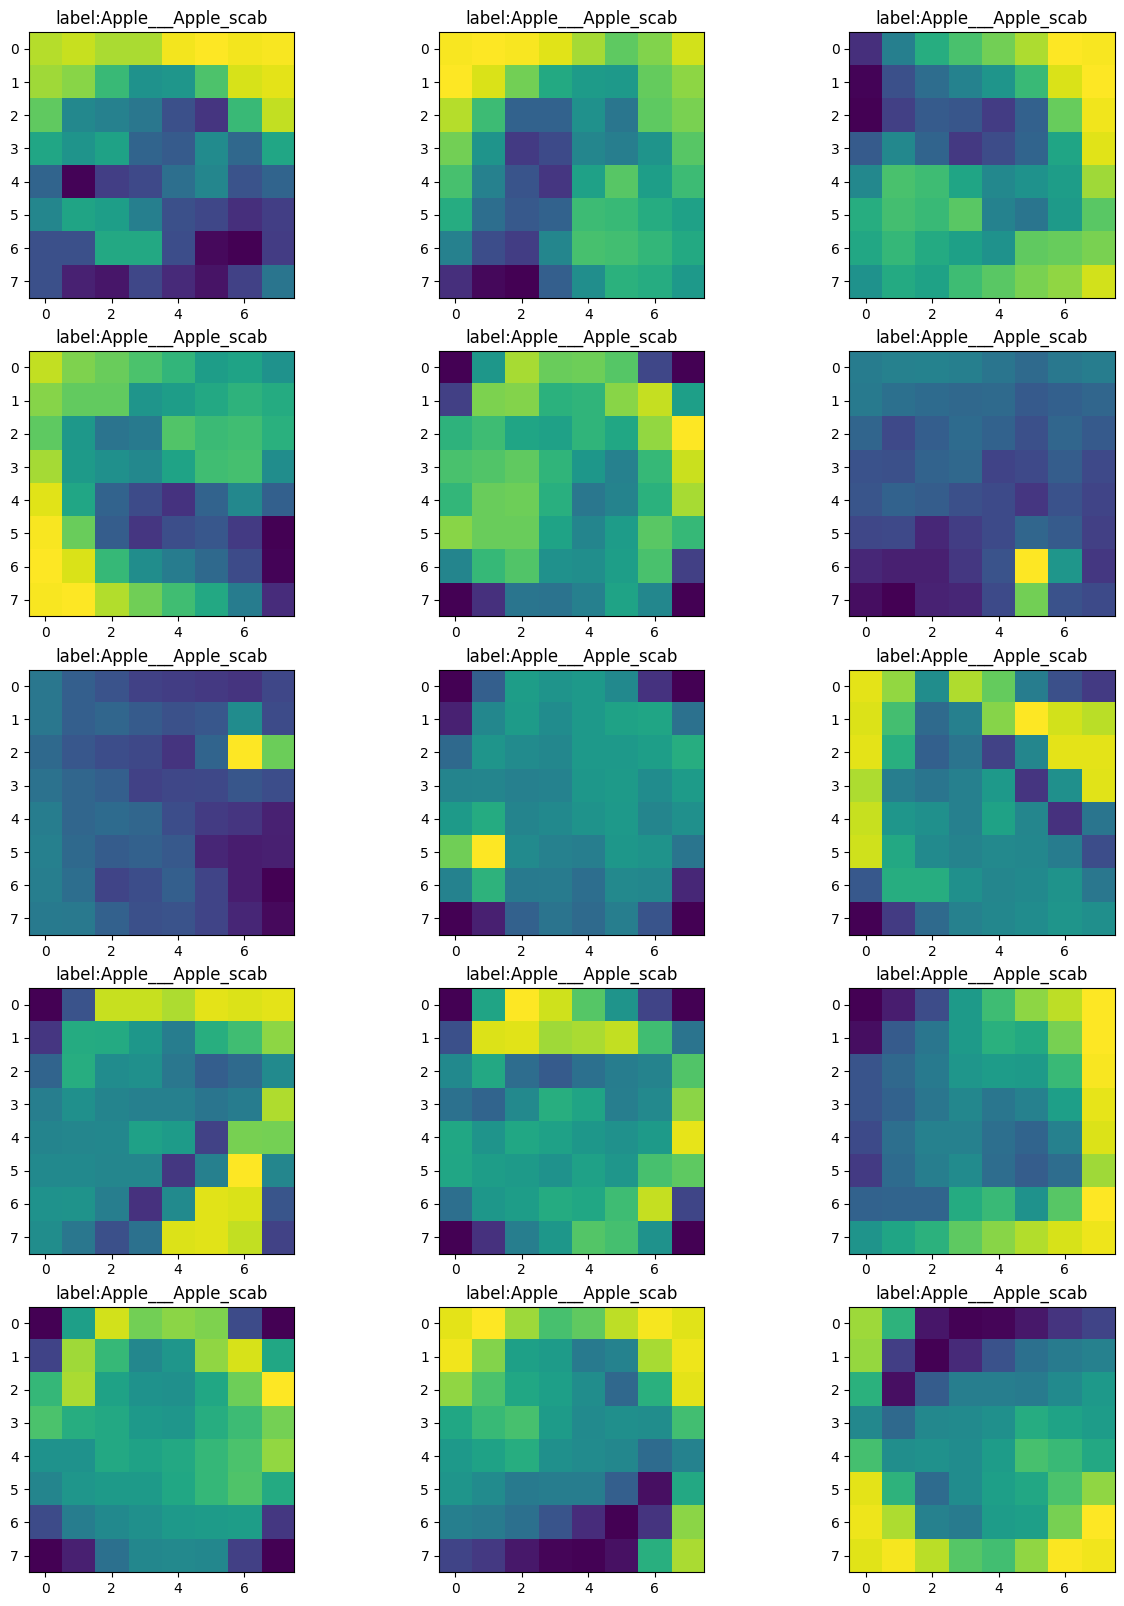

In [54]:
fig, axes=plt.subplots(5,3,figsize=(15,20))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(32,32))
    ax.set_title(f"label:{y[i]}")
plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [56]:
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [57]:
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [58]:
y_pred=knn.predict(X_test)

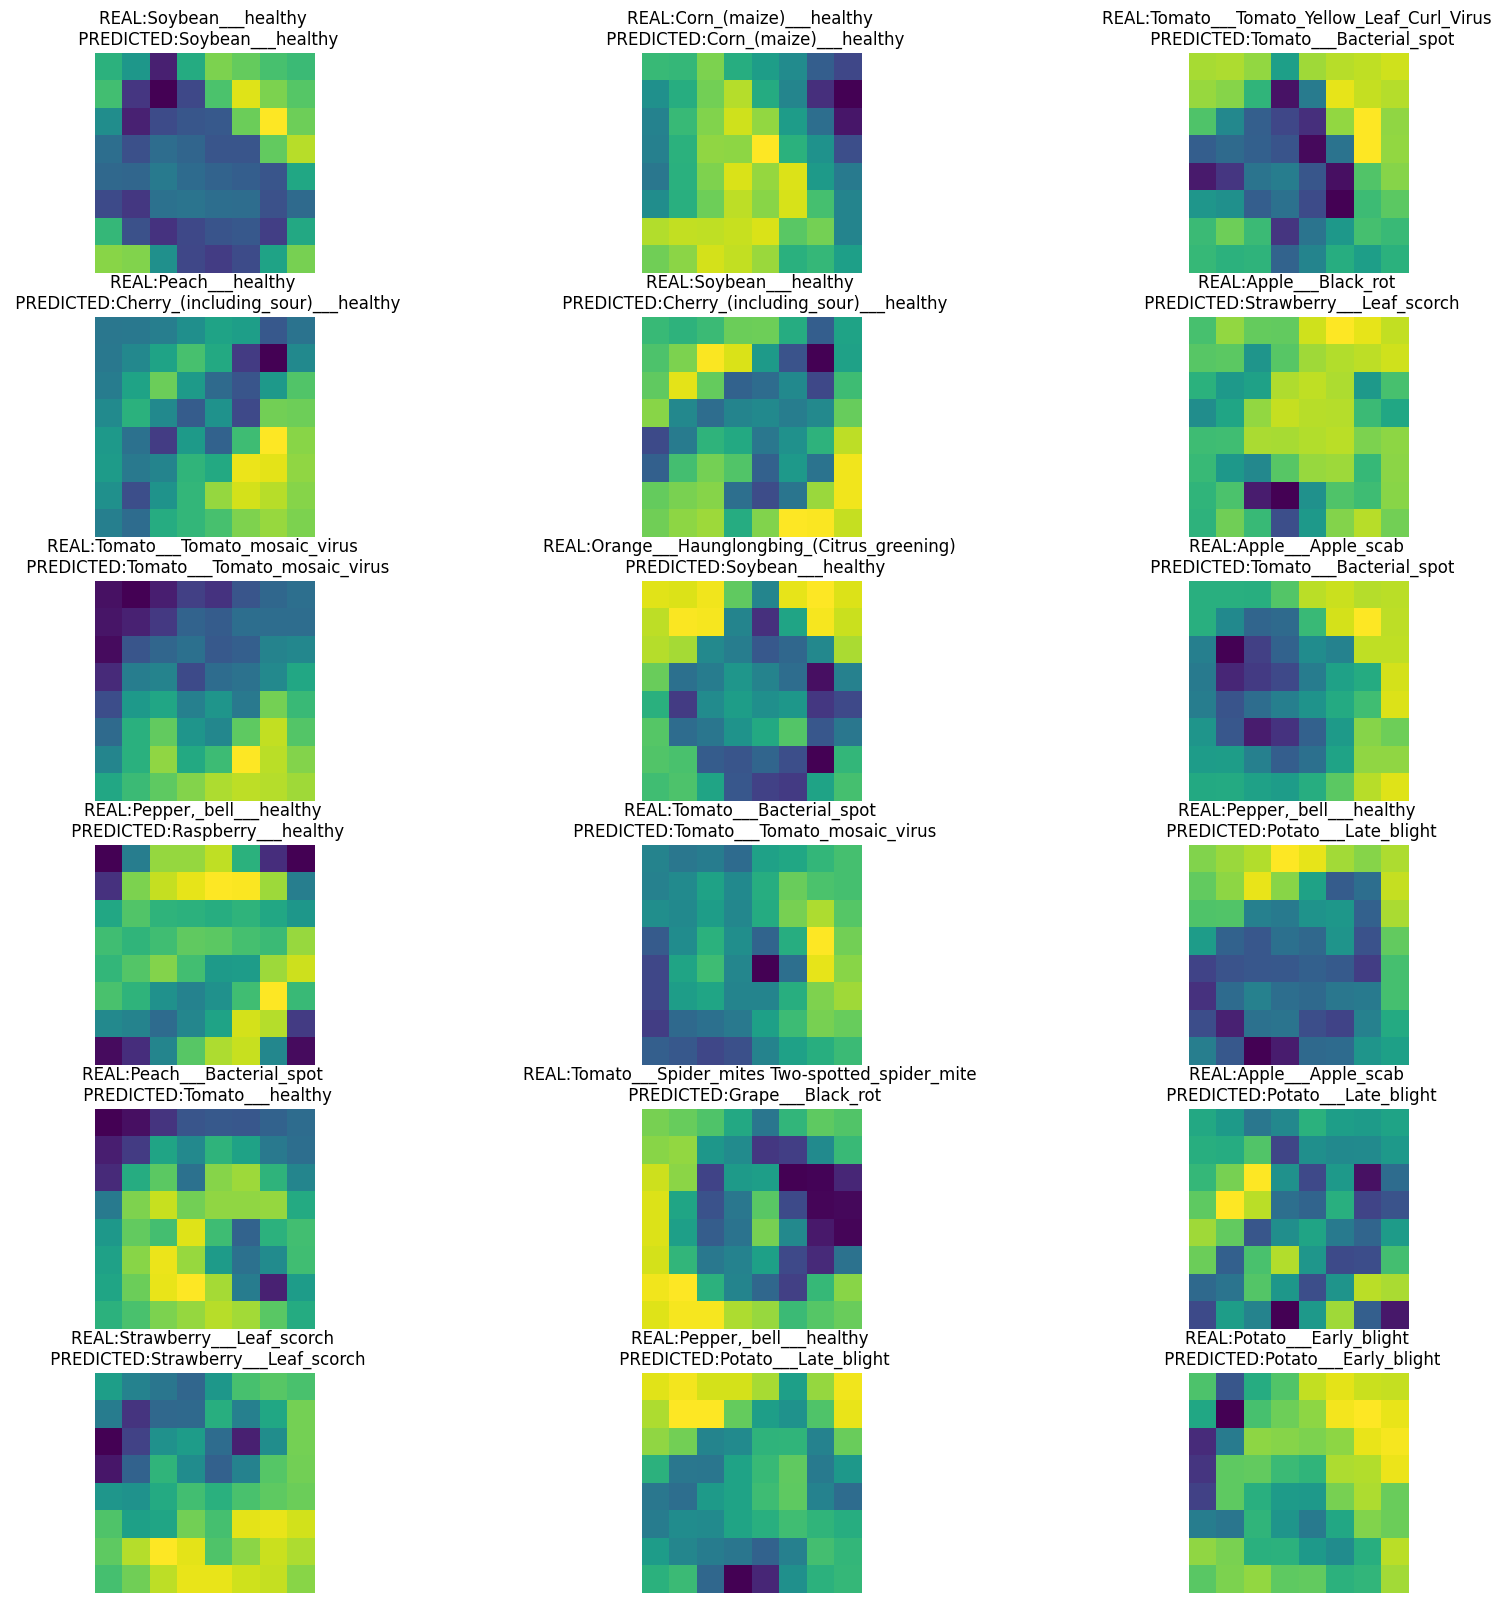

In [ ]:
fig, axes=plt.subplots(6,3,figsize=(20,20))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(32,32))
    ax.set_title(f"REAL:{y_test[i]} \n PREDICTED:{y_pred[i]}")
    ax.axis('off')
plt.show()

In [60]:
print(f'Accuracy SCORE:{accuracy_score(y_test,y_pred)*100}%')
print(f'CLASSIFICATION REPORT: \n {classification_report(y_test,y_pred)}')

Accuracy SCORE:44.45239159588735%
CLASSIFICATION REPORT: 
                                                precision    recall  f1-score   support

                           Apple___Apple_scab       0.43      0.26      0.32       406
                            Apple___Black_rot       0.74      0.33      0.46       407
                     Apple___Cedar_apple_rust       0.38      0.27      0.31       354
                              Apple___healthy       0.58      0.19      0.29       437
                          Blueberry___healthy       0.84      0.24      0.38       363
     Cherry_(including_sour)___Powdery_mildew       0.24      0.37      0.29       326
            Cherry_(including_sour)___healthy       0.37      0.82      0.51       374
                  Corn_(maize)___Common_rust_       0.99      0.86      0.92       374
                       Corn_(maize)___healthy       0.72      0.52      0.61       378
                            Grape___Black_rot       0.44      0.55    

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred=random_forest_model.predict(X_test)

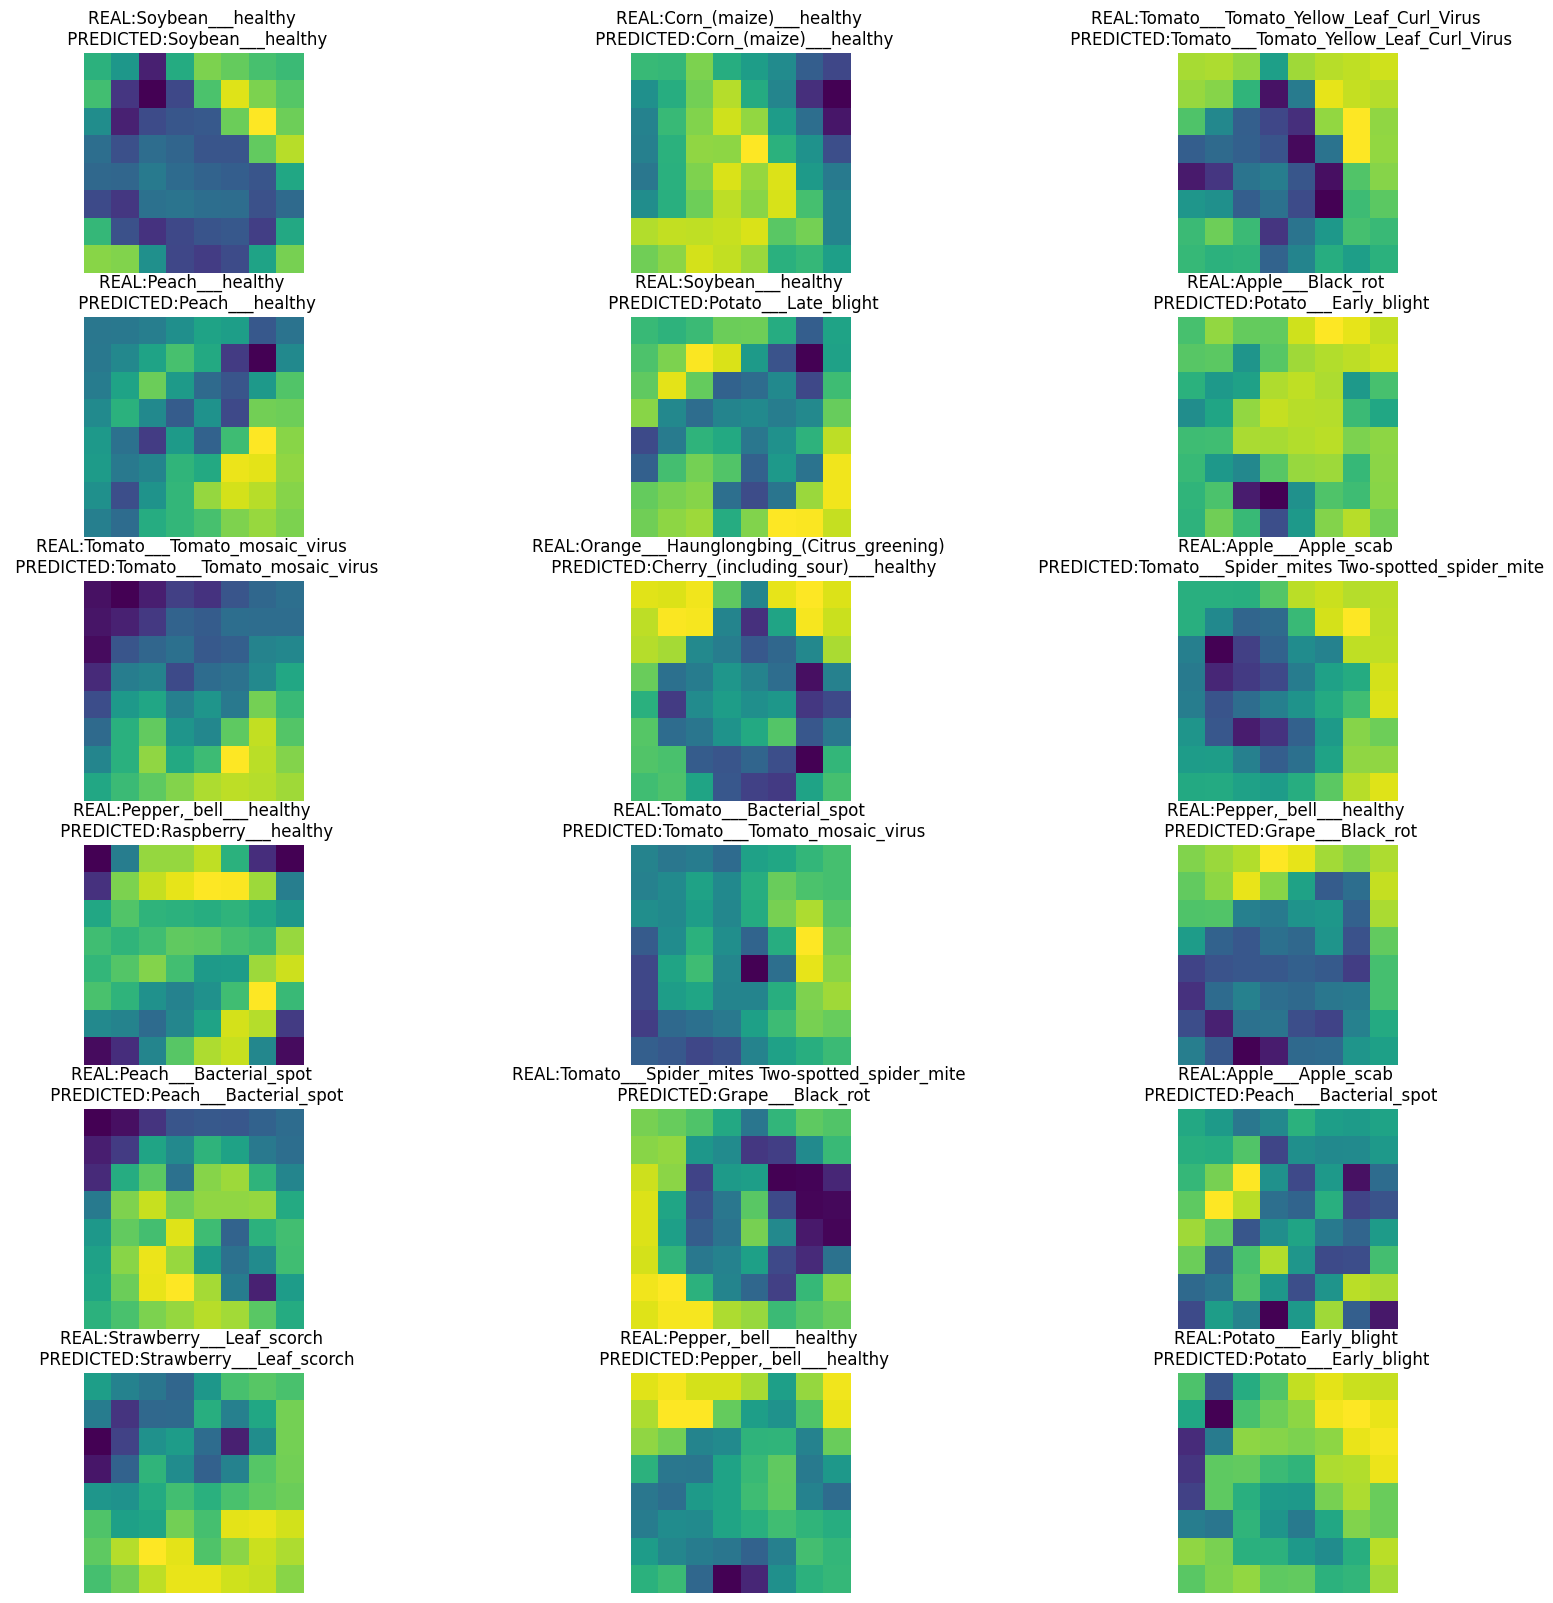

In [64]:
fig, axes=plt.subplots(6,3,figsize=(20,20))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(32,32))
    ax.set_title(f"REAL:{y_test[i]} \n PREDICTED:{y_pred[i]}")
    ax.axis('off')
plt.show()

In [65]:
print(f'Accuracy SCORE:{accuracy_score(y_test,y_pred)*100}%')
print(f'CLASSIFICATION REPORT: \n {classification_report(y_test,y_pred)}')

Accuracy SCORE:60.375502905677244%
CLASSIFICATION REPORT: 
                                                precision    recall  f1-score   support

                           Apple___Apple_scab       0.50      0.42      0.45       406
                            Apple___Black_rot       0.66      0.51      0.58       407
                     Apple___Cedar_apple_rust       0.60      0.46      0.52       354
                              Apple___healthy       0.52      0.42      0.46       437
                          Blueberry___healthy       0.72      0.73      0.73       363
     Cherry_(including_sour)___Powdery_mildew       0.44      0.41      0.43       326
            Cherry_(including_sour)___healthy       0.72      0.81      0.76       374
                  Corn_(maize)___Common_rust_       0.96      0.99      0.98       374
                       Corn_(maize)___healthy       0.70      0.65      0.67       378
                            Grape___Black_rot       0.53      0.54   